# Alignment

The `align` function projects 2 or more datasets with different coordinate systems into a common space.  By default it uses the hyperalignment algorithm ([Haxby et al, 2011](http://haxbylab.dartmouth.edu/publications/HGC+11.pdf)), but also provides the option to use the Shared Response Model (SRM) for alignment, if preferred, via the Brain Imaging Analysis Kit ([brainiak](http://brainiak.org/)).

Alignment can be particularly useful in exploring statistical properties and/or similarities of datasets that are not in the same coordinate system (such as fMRI data from visual areas of participants watching a movie, and the movie data itself).

Alignment algorithms use linear transformations to rotate and scale your datasets so they match as best as possible. For example, take these three distinct datasets. Each has a similar shape (an S), but are scaled and rotated differently. Aligning these datasets finds the transformation that minimizes the distance between them.

<img src="img/alignment.png",width=600>

## Import Hypertools

In [2]:
import hypertools as hyp
import numpy as np

%matplotlib inline

## Load your data

First, we'll load one of the sample datasets. This dataset is a list of 2 `numpy` arrays, each containing average brain activity (fMRI) from 18 subjects listening to the same story, fit using Hierarchical Topographic Factor Analysis (HTFA) with 100 nodes.  The rows are timepoints and the columns are fMRI components. 

See the [full dataset](http://dataspace.princeton.edu/jspui/handle/88435/dsp015d86p269k) or the [HTFA article](https://www.biorxiv.org/content/early/2017/02/07/106690) for more info on the data and HTFA, respectively. 

In [3]:
data = hyp.load('weights')

## Visualize unaligned data

First, we can see how the first hundred data points from two arrays in the weights data look when plotted together.

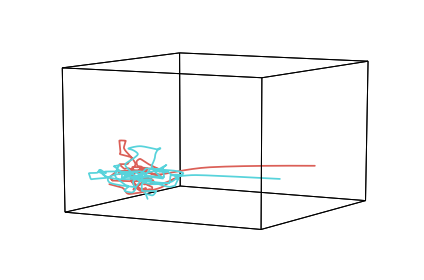

In [20]:
# average into two groups
group1 = np.mean(data[:17], 0)
group2 = np.mean(data[18:], 0)

# plot
geo = hyp.plot([group1[:100, :], group2[:100, :]])

## Aligning data with Hyperalignment

Next, we can align the two datasets (using [hyperalignment](http://papers.nips.cc/paper/5855-a-reduced-dimension-fmri-shared-response-model.pdf)) and visualize the aligned data. Note that the two datasets are now much more similar to each other.

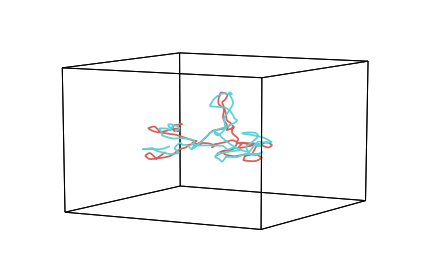

In [9]:
aligned_data = hyp.align(data)

# average into two groups
group1 = np.mean(aligned_data[:17], 0)
group2 = np.mean(aligned_data[18:], 0)

# plot
geo = hyp.plot([group1[:100, :], group2[:100, :]])

## Aligning data with the Shared Response Model

You may use the Shared Response Model for alignment by setting `align` to 'SRM'.

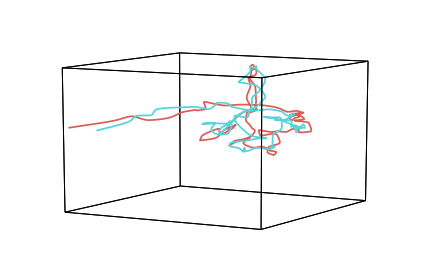

In [10]:
aligned_data = hyp.align(data, align='SRM')

# average into two groups
group1 = np.mean(aligned_data[:17], 0)
group2 = np.mean(aligned_data[18:], 0)

# plot
geo = hyp.plot([group1[:100, :], group2[:100, :]])